In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from nettools.monoplex import NetworkGenerator 
from nettools.multiplex import MultiplexConstructor
from nettools.multiplex import InterMeasures

# Generating synthetic networks
In this experiment I generate few synthetic networks, in purpose to examinate their properties
and find best candidates for future experiment. To realize this aim I implement few methods and classes, which are able to construct Multiplex networks.

#### Generate signle layer networks

In [3]:
avg_deg = 10.0
network_size = 500
ng = NetworkGenerator(network_size)
network_ba_1 = ng.ba_network(m0=int(avg_deg / 2))
network_ba_2 = ng.ba_network(m0=int(avg_deg / 2))
network_er_1 = ng.er_network(p=(avg_deg / network_size))
network_er_2 = ng.er_network(p=(avg_deg / network_size))
network_bb_1 = ng.bb_network(m0=int(avg_deg / 2))

#### Generate correlated networks for Barabassi Albert networks
To build correlated multilayer network, first we must create layers, which are correlated with other layer.
It can be done by rewiring some edges. Degree distribution is preserved but two network will be different, It's mean high degree correlation but low conditional probability between edges on each layer, given other layer.

In [4]:
mc = MultiplexConstructor()

In [5]:
network_corr_ba_1 = mc.rewire_hubs(network_ba_1, rsteps=5000)
network_corr_ba_2 = mc.rewire_hubs(network_ba_2, rsteps=150)

#### Construct Multiplex networks

In [6]:
multi_er_er = mc.construct(network_er_1, network_er_2)
multi_er_ba = mc.construct(network_er_2, network_ba_1)
multi_ba_bb = mc.construct(network_ba_1, network_bb_1)
multi_ba_ba_nc = mc.construct(network_ba_2, network_ba_1)
multi_ba_ba_corr_1 = mc.construct(network_ba_1, network_corr_ba_1)
multi_ba_ba_corr_2 = mc.construct(network_ba_2, network_corr_ba_2)

# Measure network properties
After network generation and construction, examine basic network properties

## Degree correlations
Degree correlation as conditional probability, that node i have degree k given degree d on other layer. <br>
Using this approach we can check degree correlation for our synthetic correlated multilayer network too.

#### ER - ER

In [7]:
n_layers = multi_er_er.network.shape[2]
corr_matrix = np.zeros((n_layers, n_layers))
for layer_ref in range(n_layers):
    for layer_test in range(n_layers):
        corr_matrix[layer_ref, layer_test] = InterMeasures.degree_conditional(
            multi_er_er.network[:, :, layer_ref], 
            multi_er_er.network[:, :, layer_test]
        )

In [8]:
corr_matrix

array([[ 1.   ,  0.114],
       [ 0.114,  1.   ]])

#### ER - BA

In [9]:
n_layers = multi_er_ba.network.shape[2]
corr_matrix = np.zeros((n_layers, n_layers))
for layer_ref in range(n_layers):
    for layer_test in range(n_layers):
        corr_matrix[layer_ref, layer_test] = InterMeasures.degree_conditional(
            multi_er_ba.network[:, :, layer_ref], 
            multi_er_ba.network[:, :, layer_test]
        )

In [10]:
corr_matrix

array([[ 1.   ,  0.132],
       [ 0.132,  1.   ]])

#### BA - BB

In [11]:
n_layers = multi_ba_bb.network.shape[2]
corr_matrix = np.zeros((n_layers, n_layers))
for layer_ref in range(n_layers):
    for layer_test in range(n_layers):
        corr_matrix[layer_ref, layer_test] = InterMeasures.degree_conditional(
            multi_ba_bb.network[:, :, layer_ref], 
            multi_ba_bb.network[:, :, layer_test]
        )

In [12]:
corr_matrix

array([[ 1.   ,  0.242],
       [ 0.242,  1.   ]])

#### BA - BA

In [13]:
n_layers = multi_ba_ba_nc.network.shape[2]
corr_matrix = np.zeros((n_layers, n_layers))
for layer_ref in range(n_layers):
    for layer_test in range(n_layers):
        corr_matrix[layer_ref, layer_test] = InterMeasures.degree_conditional(
            multi_ba_ba_nc.network[:, :, layer_ref], 
            multi_ba_ba_nc.network[:, :, layer_test]
        )

In [14]:
corr_matrix

array([[ 1.  ,  0.27],
       [ 0.27,  1.  ]])

Lower *m* parameter leads to higher correlation between nodes.

#### BA - BA [Correlation]

In [15]:
n_layers = multi_ba_ba_corr_1.network.shape[2]
corr_matrix = np.zeros((n_layers, n_layers))
for layer_ref in range(n_layers):
    for layer_test in range(n_layers):
        corr_matrix[layer_ref, layer_test] = InterMeasures.degree_conditional(
            multi_ba_ba_corr_1.network[:, :, layer_ref], 
            multi_ba_ba_corr_1.network[:, :, layer_test]
        )

In [16]:
corr_matrix

array([[ 1.,  1.],
       [ 1.,  1.]])

As we can see from previous reaserch, for first three networks there is no correlation between layers.
Only last multilayer network is highly correlated as it was expected.

## Degree distribution
Degree distribution for each network.

#### ER - ER

In [17]:
deg_dist_erer = InterMeasures.degree_distribution(multi_er_er.network)
kcorr_erer = InterMeasures.kendal_corr(deg_dist_erer)

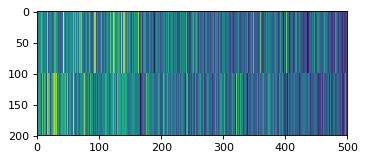

In [18]:
fig=plt.figure(figsize=(5, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(np.repeat(deg_dist_erer, 100, axis=0))
plt.show()

By looking at degree distribution plot for two random network we can see that, both layers are not correlated and for each network degree is Poisson distributed, all nodes have degree not far from distribution mean value.
Using random network in experiment I want to check *Buldyrev* thesis about percolation threshold for interdependent networks *Catastrophic cascade of failures in interdependent networks*

#### ER - BA

In [19]:
deg_dist_erba = InterMeasures.degree_distribution(multi_er_ba.network)
kcorr_erba = InterMeasures.kendal_corr(deg_dist_erba)

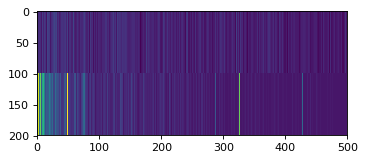

In [20]:
fig=plt.figure(figsize=(5, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(np.repeat(deg_dist_erba, 100, axis=0))
plt.show()

Network constructed using **BA** network and **ER** network is also not correlated network. As expected random layer is Poisson distributed when BA layer is power-law network, few hubs and many small degree nodes.

#### BA - BB

Multilayer network made by concatenation **Barabasi Albert** network and **Barabasi Bianconi** network have little lower correlation than network **BA - BA**, by looking at degree distribution also we can see that degrees are different *distributed than for **BA** network - *Hubs are the oldest nodes*, **BB** network hubs can be at different possitions*. 

In [21]:
deg_dist_babb = InterMeasures.degree_distribution(multi_ba_bb.network)
kcorr_babb = InterMeasures.kendal_corr(deg_dist_babb)

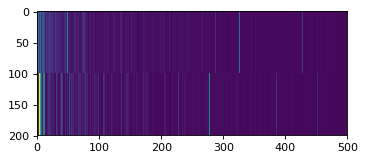

In [22]:
fig=plt.figure(figsize=(5, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(np.repeat(deg_dist_babb, 100, axis=0))
plt.show()

#### BA - BA [No correlation]

In [23]:
deg_dist_baba = InterMeasures.degree_distribution(multi_ba_ba_nc.network)
kcorr_baba = InterMeasures.kendal_corr(deg_dist_baba)

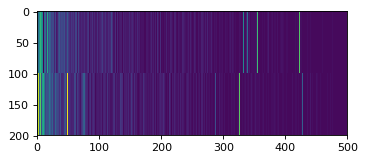

In [24]:
fig=plt.figure(figsize=(5, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(np.repeat(deg_dist_baba, 100, axis=0))
plt.show()

#### BA - BA [Correlated]

In [25]:
deg_dist_baba_corr = InterMeasures.degree_distribution(multi_ba_ba_corr_1.network)
kcorr_baba_corr = InterMeasures.kendal_corr(deg_dist_baba_corr)

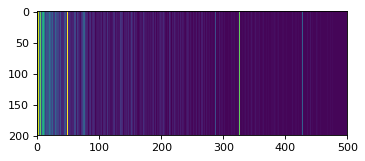

In [26]:
fig=plt.figure(figsize=(5, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(np.repeat(deg_dist_baba_corr, 100, axis=0))
plt.show()

Last degree distribution plot shows us that besides rewiring many nodes, *degree distribution* for rewired layer is **preserved**. That leads to the fact that our network have **same** *degree distribution* for each layer and two layers are **highly correlated**.

# Participation coefficient
Participation coefficient measure in how many layers node participate. Some nodes could have high degree in one layer and very small degree in other, participation coefficient helps us to measure how node degrees are distributed across all layers.

#### ER - ER

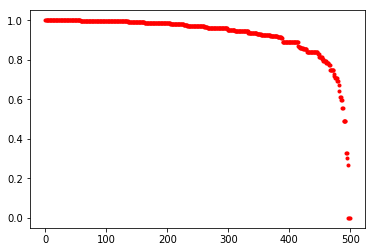

In [27]:
pc_erer = InterMeasures.participation_coeff(multi_er_er.network)
plt.figure()
plt.plot(np.sort(pc_erer)[::-1], '.r')
plt.show()

In Erdos Renyi networks all nodes have similiar degrees, so probably participation coefficient highly depends on network degree distribution mean ratio. In analyzed network layers have similiar mean value, that's why probably participation coefficient is nearly equal 1.0.

#### ER - BA

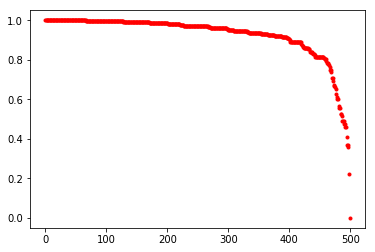

In [28]:
pc_erba = InterMeasures.participation_coeff(multi_er_ba.network)
plt.figure()
plt.plot(np.sort(pc_erba)[::-1], '.r')
plt.show()

Participation coefficient for mixed network **ER + BA** highly depends on random netork mean value.
* When value is high, nodes from random layer have comparable degree to hubs in BA network [small coefficient]
* When value is low, many nodes from random layer have comparable degree to low connected nodes from BA layer, in BA network there is a lot of low connected nodes, thats imply high values of praticipation coeff

#### BA - BB

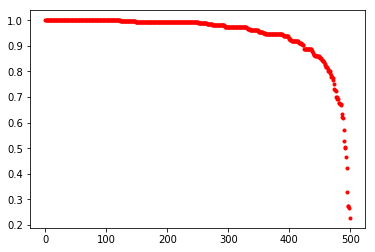

In [29]:
pc_babb = InterMeasures.participation_coeff(multi_ba_bb.network)
plt.figure()
plt.plot(np.sort(pc_babb)[::-1], '.r')
plt.show()

Participation coefficient for **BA-BB** network looks very similiar to **BA-BA** network, this might be couse by scale-free property of both networks (*many small connected nodes*, *few hubs*). Despite that participation coefficient for **BA-BA** is little higher, probably becouse hubs for **BA-BA** have similiar position (*the oldest nodes*), for in **BB** networks *hubs* position is related to fitness parameter.

#### BA - BA

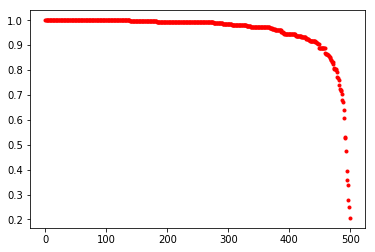

In [30]:
pc_baba_nc = InterMeasures.participation_coeff(multi_ba_ba_nc.network)
plt.figure()
plt.plot(np.sort(pc_baba_nc)[::-1], '.r')
plt.show()

Participation coefficient value for two *Barabassi Albert* networks depends on parameter *m*, which characterize this type of network. When we divide *p* by 2 in random layer [**ER - ER** network] and we divide *m* by 2 for **BA** layer in [**BA - BA**] network, we will see that **BA-BA** Multilayer is more robust.

Same *m* for two **BA** layer results in better participation, than same *p* for two **ER** layers.

#### BA - BA [Correlated]

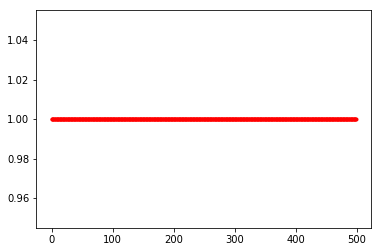

In [31]:
pc_baba_corr_1 = InterMeasures.participation_coeff(multi_ba_ba_corr_1.network)
plt.figure()
plt.plot(np.sort(pc_baba_corr_1)[::-1], '.r')
plt.show()

## Participation Coefficient and Aggregated Degree 

Next for my reaserch I ploted *participation coefficient* with aggregated degree normalized as *z-score*. 
Analysing results we can discover very interesting networks features, for example we can deduce how much contribution have high connected nodes in each layers.

#### ER - ER

In [39]:
over_deg_erer = np.sum(InterMeasures.overlap(multi_er_er.network), axis=1)
z_score_erer = (over_deg_erer - np.mean(over_deg_erer)) / np.std(over_deg_erer)

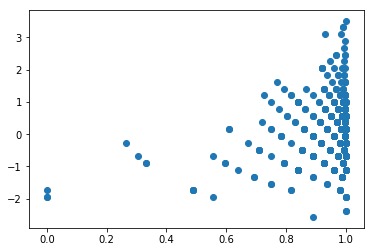

In [40]:
plt.figure()
plt.scatter(pc_erer, z_score_erer)
plt.show()

In this plot can be seen that for two random layers all nodes have **participation coefficient** nearly equal 1.
In random layers degree distribution have low standard deviation, this fact implies that, when all nodes are connected and all nodes have similiar degrees, we have uniformly distributed participation between layers, this fact can be seen at above plot **PC** for **ER - ER** network is equal *~ [0.96, 1.0]* for **90% of nodes**.

#### ER - BA

In [41]:
over_deg_erba = np.sum(InterMeasures.overlap(multi_er_ba.network), axis=1)
z_score_erba = (over_deg_erba - np.mean(over_deg_erba)) / np.std(over_deg_erba)

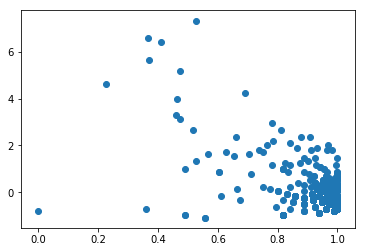

In [42]:
plt.figure()
plt.scatter(pc_erba, z_score_erba)
plt.show()

Next three types of networks will be analysed **ER - BA**, **BA - BB**, **BA - BA**. Results plot strictly dependes on analysed network properties, in first case concatenation *random network* and *barabassi albert network* have **PC** from range **[0.5, 1.0]**, this fact probably highly depend on parameter **p** for *random network* and **m0** for *barabassi albert network*. But in analysed case low degree nodes in **BA** network have similiar degrees as **ER** network nodes, but still there is few highly connected nodes, which leads to lower **PC**. 

#### BA - BB

In [43]:
over_deg_babb = np.sum(InterMeasures.overlap(multi_ba_bb.network), axis=1)
z_score_babb = (over_deg_babb - np.mean(over_deg_babb)) / np.std(over_deg_babb)

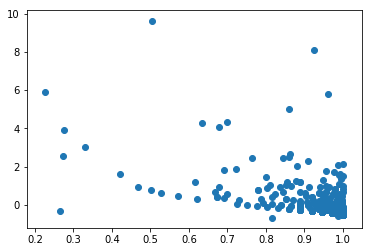

In [44]:
plt.figure()
plt.scatter(pc_babb, z_score_babb)
plt.show()

In second plot we can see that most nodes have high **PC**, minly high **PC** nodes are low connected noddes, which are the same for both *scale-free* networks, but differently than **BA**, **BB** have hubs on different possition, thats why few highly connected nodes have low **PC**.

#### BA - BA

In [45]:
over_deg_baba_nc = np.sum(InterMeasures.overlap(multi_ba_ba_nc.network), axis=1)
z_score_baba_nc = (over_deg_baba_nc - np.mean(over_deg_baba_nc)) / np.std(over_deg_baba_nc)

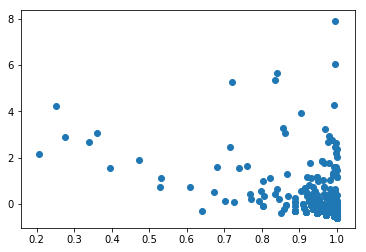

In [46]:
plt.figure()
plt.scatter(pc_baba_nc, z_score_baba_nc)
plt.show()

**BA - BA** Network have rather high **PC** it depends on fact that in **BA** network the oldest nodes have high degree, so 
highly and low connected nodes are on similiar positions.

## Probability approach

In reaserch I decided to visualize probability approach of having node on test layer given test layer.
As expected there is not correlation between edges even for correlated **BA - BA** network

#### ER - ER

In [47]:
proba_erer = InterMeasures.link_layer_dependence(multi_er_er.network)
proba_erer


array([[ 1.        ,  0.02006866],
       [ 0.01975052,  1.        ]])

#### ER - BA

In [48]:
proba_erba = InterMeasures.link_layer_dependence(multi_er_ba.network)
proba_erba


array([[ 1.        ,  0.01767152],
       [ 0.01371521,  1.        ]])

#### BA - BB

In [49]:
proba_babb = InterMeasures.link_layer_dependence(multi_ba_bb.network)
proba_babb

array([[ 1.        ,  0.05082695],
       [ 0.05078597,  1.        ]])

#### BA-BA

In [50]:
proba_baba_nc = InterMeasures.link_layer_dependence(multi_ba_ba_nc.network)
proba_baba_nc

array([[ 1.        ,  0.04274194],
       [ 0.04275918,  1.        ]])

#### BA-BA [Correlation]

In [51]:
proba_baba_corr = InterMeasures.link_layer_dependence(multi_ba_ba_corr_1.network)
proba_baba_corr

array([[ 1.       ,  0.1746672],
       [ 0.1746672,  1.       ]])

## Probability approach with aggregated layer

Using probability approach with aggregated network we can obtain information about single layer importance.
In future this information can be use for example to create better representation of aggregated weighted network.

#### ER-ER

In [50]:
n_layers = multi_er_er.network.shape[-1]
layer_scores_erer = []
for layer_idx in range(n_layers):
    proba_layer_erer = InterMeasures.link_conditional(agg_net_erer, 
                                                      multi_er_er.network[:, :, layer_idx])
    layer_scores_erer.append(proba_layer_erer)
fin_scores_erer = np.sort(layer_scores_erer)
fin_arg_scores = np.argsort(layer_scores_erer)

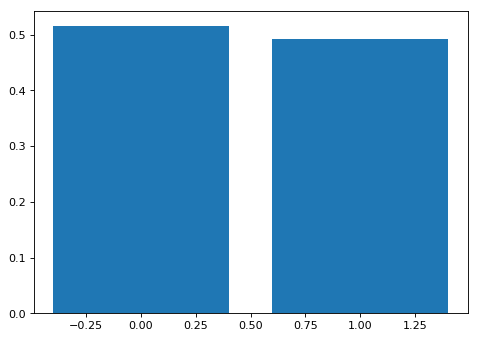

In [51]:
fig=plt.figure(figsize=(7, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(fin_arg_scores, fin_scores_erer)
plt.show()

#### ER-BA

In [52]:
n_layers = multi_er_ba.network.shape[-1]
layer_scores_erba = []
for layer_idx in range(n_layers):
    proba_layer_erba = InterMeasures.link_conditional(agg_net_erba, 
                                                      multi_er_ba.network[:, :, layer_idx])
    layer_scores_erba.append(proba_layer_erba)
fin_scores_erba = np.sort(layer_scores_erba)
fin_arg_scores = np.argsort(layer_scores_erba)

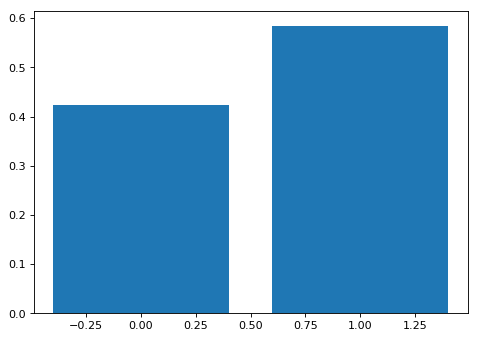

In [53]:
fig=plt.figure(figsize=(7, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(fin_arg_scores, fin_scores_erba)
plt.show()

#### BA - BB

In [54]:
n_layers = multi_ba_bb.network.shape[-1]
layer_scores_babb = []
for layer_idx in range(n_layers):
    proba_layer_babb = InterMeasures.link_conditional(agg_net_babb, multi_ba_bb.network[:, :, layer_idx])
    layer_scores_babb.append(proba_layer_babb)
fin_scores_babb = np.sort(layer_scores_babb)
fin_arg_scores = np.argsort(layer_scores_babb)

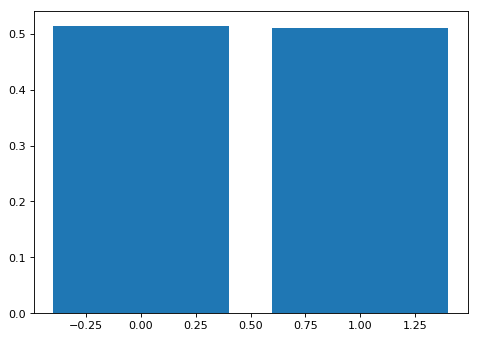

In [55]:
fig=plt.figure(figsize=(7, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(fin_arg_scores, fin_scores_babb)
plt.show()

#### BA-BA 

In [56]:
n_layers = multi_ba_ba_nc.network.shape[-1]
layer_scores_baba_nc = []
for layer_idx in range(n_layers):
    proba_layer_baba_nc = InterMeasures.link_conditional(agg_net_baba_nc, 
                                                      multi_ba_ba_nc.network[:, :, layer_idx])
    layer_scores_baba_nc.append(proba_layer_baba_nc)
fin_scores_baba_nc = np.sort(layer_scores_baba_nc)
fin_arg_scores = np.argsort(layer_scores_baba_nc)

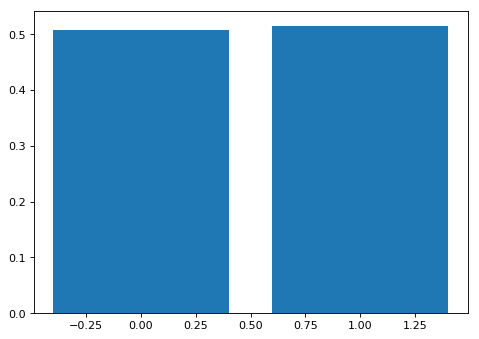

In [57]:
fig=plt.figure(figsize=(7, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(fin_arg_scores, fin_scores_baba_nc)
plt.show()

#### BA-BA Correlation

In [58]:
n_layers = multi_ba_ba_corr_1.network.shape[-1]
layer_scores_baba_corr_1 = []
for layer_idx in range(n_layers):
    proba_layer_baba_corr_1 = InterMeasures.link_conditional(agg_net_baba_corr_1, 
                                                      multi_ba_ba_corr_1.network[:, :, layer_idx])
    layer_scores_baba_corr_1.append(proba_layer_baba_corr_1)
fin_scores_baba_corr_1 = np.sort(layer_scores_baba_corr_1)
fin_arg_scores = np.argsort(layer_scores_baba_corr_1)

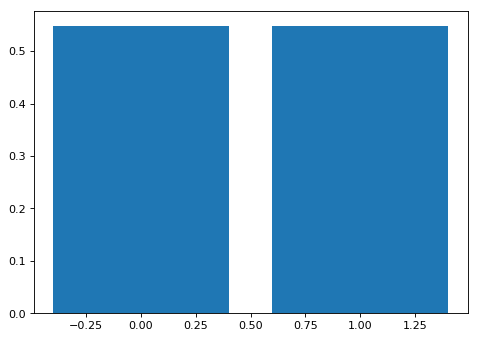

In [59]:
fig=plt.figure(figsize=(7, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(fin_arg_scores, fin_scores_baba_corr_1)
plt.show()

## Interdependence

This parameter gives us information about single layer importance, interdependence can be undestood as information which layer is base layer for other layers. This metric is calculated by counting how many shortes path from node i to node j go through examined layer divided by all shortes paths in graph.

#### ER - ER

In [60]:
inter_params_erer = InterMeasures.network_interdependence(multi_er_er.network)

In [61]:
"Network interdependence: {}".format(inter_params_erer[0])

'Network interdependence: 2.36898690791'

In [62]:
inter_erer = np.sort(inter_params_erer[1])
inter_arg_scores_erer = np.argsort(inter_params_erer[1])

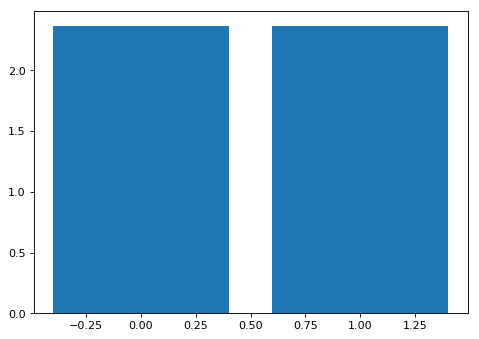

In [63]:
fig=plt.figure(figsize=(7, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(inter_arg_scores_erer, inter_erer)
plt.show()

#### ER - BA

In [64]:
inter_params_erba = InterMeasures.network_interdependence(multi_er_ba.network)

In [65]:
"Network interdependence: {}".format(inter_params_erba[0])

'Network interdependence: 1.63000335804'

In [66]:
inter_erba = np.sort(inter_params_erba[1])
inter_arg_scores_erba = np.argsort(inter_params_erba[1])

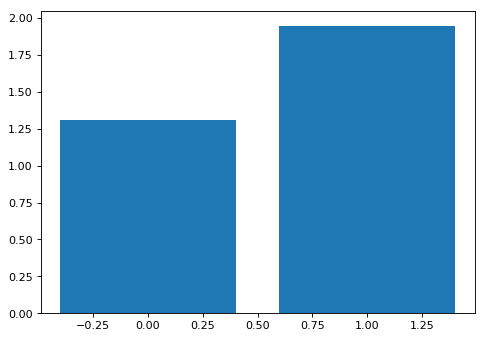

In [67]:
fig=plt.figure(figsize=(7, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(inter_arg_scores_erba, inter_erba)
plt.show()

#### BA - BA [No Correlation]

In [68]:
inter_params_baba_nc = InterMeasures.network_interdependence(multi_ba_ba_nc.network)

In [69]:
"Network interdependence: {}".format(inter_params_baba_nc[0])

'Network interdependence: 3.16974947497'

In [70]:
inter_baba_nc = np.sort(inter_params_baba_nc[1])
inter_arg_scores_baba_nc = np.argsort(inter_params_baba_nc[1])

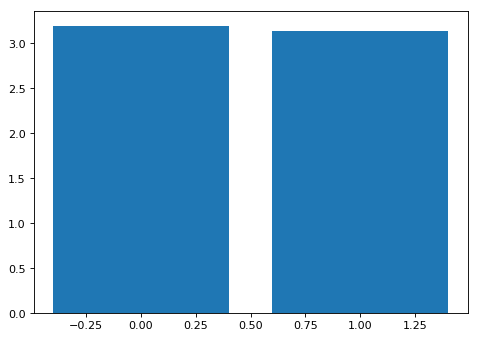

In [71]:
fig=plt.figure(figsize=(7, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(inter_arg_scores_baba_nc, inter_baba_nc)
plt.show()

#### BA - BA [Correlation]

In [72]:
inter_params_baba_corr_1 = InterMeasures.network_interdependence(multi_ba_ba_corr_1.network)

In [73]:
"Network interdependence: {}".format(inter_params_baba_corr_1[0])

'Network interdependence: 2.1094947649'

In [74]:
inter_baba_corr_1 = np.sort(inter_params_baba_corr_1[1])
inter_arg_scores_baba_corr_1 = np.argsort(inter_params_baba_corr_1[1])

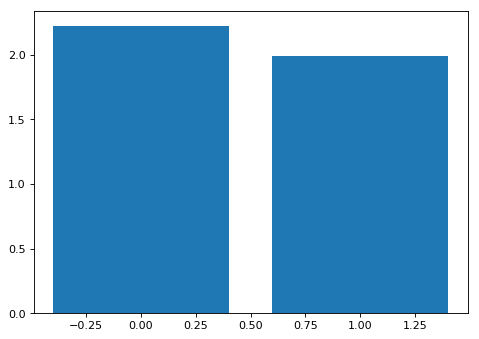

In [75]:
fig=plt.figure(figsize=(7, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(inter_arg_scores_baba_corr_1, inter_baba_corr_1)
plt.show()

# Clustering Coefficient

*Clustering coefficient* gives us information about how many connection is between node neighboors. For coefficient **1.0** evey neighboor node is connected with **all other** nodes neighboors. For multilayer networks instead of counting triangles in single network we compute triangles build using edges, which are in two layers.
<br>
Analysing *clustering coefficient* we can retrive some information about *information spreading* in networks, in many cases small clustering leasds to better spreading in network.

#### ER - ER

In [76]:
im = InterMeasures()
im.network_graph_np = multi_er_er.network
im.network_weights_np = multi_er_er.network

In [77]:
cluster_nodes = im.one_triad_clustering_pool()

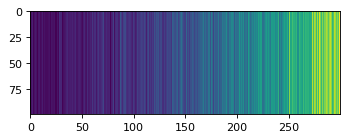

In [78]:
fig=plt.figure(figsize=(5, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(np.repeat(np.array(cluster_nodes)[np.newaxis, :], 100, axis=0))
plt.show()

In [79]:
print("Network clustering coefficient: {}".format(np.mean(cluster_nodes)))

Network clustering coefficient: 0.169881354454


For **random network** we have the biggest clustering coefficient, caused by Poisson degree distribution and lack of preferential attachment.

#### ER - BA

In [80]:
im = InterMeasures()
im.network_graph_np = multi_er_ba.network
im.network_weights_np = multi_er_ba.network

In [81]:
cluster_nodes = im.one_triad_clustering_pool()

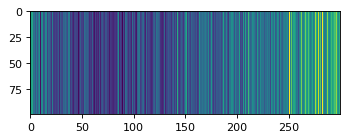

In [82]:
fig=plt.figure(figsize=(5, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(np.repeat(np.array(cluster_nodes)[np.newaxis, :], 100, axis=0))
plt.show()

In [83]:
print("Network clustering coefficient: {}".format(np.mean(cluster_nodes)))

Network clustering coefficient: 0.0880868633978


Mix Poissonian distribution of **random network** and scale-free character of **BA** network gives as the worst results, when analysing clustering. **PA** and Poisson not gives good results n this field.

#### BA - BB

In [84]:
im = InterMeasures()
im.network_graph_np = multi_ba_bb.network
im.network_weights_np = multi_ba_bb.network

In [85]:
cluster_nodes = im.one_triad_clustering_pool()

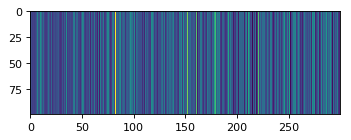

In [86]:
fig=plt.figure(figsize=(5, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(np.repeat(np.array(cluster_nodes)[np.newaxis, :], 100, axis=0))
plt.show()

In [87]:
print("Network clustering coefficient: {}".format(np.mean(cluster_nodes)))

Network clustering coefficient: 0.118184114077


Slighty better than previous one, but still different hub possition can influence on result, making it worse. 

#### BA - BA [No Correlation]

In [88]:
im = InterMeasures()
im.network_graph_np = multi_ba_ba_nc.network
im.network_weights_np = multi_ba_ba_nc.network

In [89]:
cluster_nodes = im.one_triad_clustering_pool()

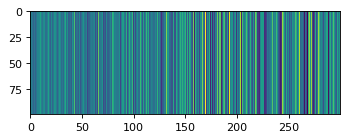

In [90]:
fig=plt.figure(figsize=(5, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(np.repeat(np.array(cluster_nodes)[np.newaxis, :], 100, axis=0))
plt.show()

In [91]:
print("Network clustering coefficient: {}".format(np.mean(cluster_nodes)))

Network clustering coefficient: 0.11533250342


#### BA - BA [Correlation]

In [92]:
im = InterMeasures()
im.network_graph_np = multi_ba_ba_corr_1.network
im.network_weights_np = multi_ba_ba_corr_1.network

In [93]:
cluster_nodes = im.one_triad_clustering_pool()

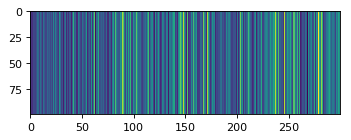

In [94]:
fig=plt.figure(figsize=(5, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(np.repeat(np.array(cluster_nodes)[np.newaxis, :], 100, axis=0))
plt.show()

In [95]:
print("Network clustering coefficient: {}".format(np.mean(cluster_nodes)))

Network clustering coefficient: 0.143545386231


Using two correlated **BA** networks, we archieved clustering coefficient similiar to this from **ER** - Random network. This fact can lead to better spreading.